<a href="https://colab.research.google.com/github/YazCodes/Deep-Learning-projects/blob/main/Prediction3_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DQN for cartpole

In [1]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

     |████████████████████████████████| 61kB 3.1MB/s 


In [2]:
!pip install gym

In [3]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

In [ ]:
print(env.observation_space.shape) #gives us a tupel. 0 is the first element of the tupel

(4,)


In [ ]:
#number of actions 
print(env.action_space.n)

2


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_30 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 66        
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________
None
Training for 8000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   11/8000: episode: 1, duration: 3.102s, episode steps:  11, steps per second:   4, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.182 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   31/8000: episode: 2, duration: 0.173s, episode steps:  20, steps per second: 115, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 0.434517, mae: 0.571529, mean_q: 0.483668, mean_eps: 0.997694


/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   42/8000: episode: 3, duration: 0.116s, episode steps:  11, steps per second:  95, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.636 [0.000, 1.000],  loss: 0.337874, mae: 0.580384, mean_q: 0.527409, mean_eps: 0.995950
   73/8000: episode: 4, duration: 0.303s, episode steps:  31, steps per second: 102, episode reward: 31.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.516 [0.000, 1.000],  loss: 0.222962, mae: 0.597442, mean_q: 0.639426, mean_eps: 0.993588
   88/8000: episode: 5, duration: 0.164s, episode steps:  15, steps per second:  91, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.600 [0.000, 1.000],  loss: 0.136964, mae: 0.629038, mean_q: 0.856374, mean_eps: 0.991000
  104/8000: episode: 6, duration: 0.166s, episode steps:  16, steps per second:  96, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.562 [0.000, 1.000],  loss: 0.075219, mae: 0.667891, mean_q: 1.052083, mean_eps: 0.989

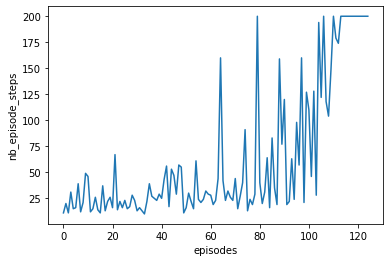

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [13]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannQPolicy, LinearAnnealedPolicy, EpsGreedyQPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent

memory = SequentialMemory(limit=10000, window_length=1) #setting up the experince replay buffer
#limit = the numer of steps of episodes stored in the replay buffer

# define the policy (how we select the actions)
# setup the Linear annealed policy with the EpsGreedyQPolicy as the inner policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(),   # policy used to select actions
                               attr='eps',                        # attribute in the inner policy to vary             
                               value_max=1.,                       # maximum value of attribute that is varying
                               value_min=.1,                      # minimum value of attribute that is varying
                               value_test=.09,  #0.9??                  # test if the value selected is < 0.05
                               nb_steps=8000)                    # the number of steps between value_max and value_min

#need to change the value_max and value_min. 
# Q-Network
model = Sequential() #sequnetial model 
model.add(Input(shape=(1,env.observation_space.shape[0]))) # 1 = one observation and env.observation_space.shape is the number of states within our observation. 0 = the first element of the tupel
model.add(Flatten())
# extra layers here
model.add(Dense(16, activation='relu')) #layer 1
model.add(Dense(32, activation='relu')) #layer 2
#model.add(Dense(64, activation='relu')) #layer 2

model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space. Activation has to be linear due to how the q value does its calculation
print(model.summary())

# define the agent using the DQNAgent class
dqn = DQNAgent(model=model,                     # Q-Network model created above ^
               nb_actions=env.action_space.n,   # number of actions used above - the data from the enviroment
               memory=memory,                   # experience replay memory
               nb_steps_warmup=10,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=8000, visualize=False, verbose=2) #visualize false to save time


# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()
dqn.test(env, nb_episodes=20, visualize=False) #testing for 20 episodes, reward should all be 200- evaluating my algortithm 

